In [1]:
import matplotlib.pyplot as plt
import numpy as np


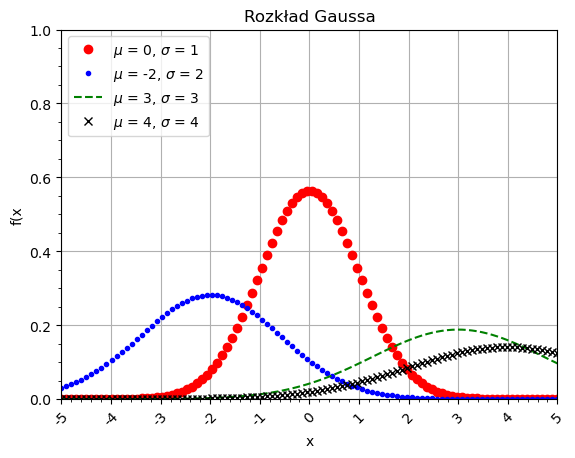

In [2]:
def f(x, std_dev, x_mean):
    f = (1 / (std_dev * np.sqrt(np.pi))) * np.exp((-(x - x_mean) ** 2) / (2 * std_dev))
    return f

fig, ax = plt.subplots()

x = np.linspace(-5, 5, 100)

std_dev = 1
x_mean = 0
f1 = f(x, std_dev, x_mean)
ax.plot(x, f1, 'ro')

std_dev = 2
x_mean = -2
f2 = f(x, std_dev, x_mean)
ax.plot(x, f2, 'b.')

std_dev = 3
x_mean = 3
f3 = f(x, std_dev, x_mean)
ax.plot(x, f3, 'g--')

std_dev = 4
x_mean = 4
f4 = f(x, std_dev, x_mean)
ax.plot(x, f4, 'kx')

ax.grid(True)
ax.set_title('Rozkład Gaussa')

ax.set_ylim(0, 1)
ax.set_xlim(-5, 5)

ax.set_xlabel('x')
ax.set_ylabel('f(x')

ax.legend(['$\\mu$ = 0, $\\sigma$ = 1',
            '$\\mu$ = -2, $\\sigma$ = 2',
            '$\\mu$ = 3, $\\sigma$ = 3',
            '$\\mu$ = 4, $\\sigma$ = 4'], loc='upper left')

ax.set_xticks(np.arange(-5, 6, 1))
ax.minorticks_on()
ax.set_xticklabels(ax.get_xticks(), rotation=45)

plt.show()

🔥 Zadanie 3 🔥

Dany jest plik w formacie JSON, zamierający informacje o procencie osób, które przeżyły raka w populacji USA (324 mln) według płci i wieku w 2016 roku: cancer_survival_in_us.json (źródło: https://cebp.aacrjournals.org/content/25/7/1029).

wygeneruj wykres

In [3]:
import json
import pandas as pd

data = json.load(open('cancer_survival_in_us.json'))

pd_data = pd.read_json(json.dumps(data['age_groups']))
pd_data

,age,male_survivors,female_survivors
0,40-44,1,2
1,45-49,2,4
2,50-54,3,5
3,55-59,6,7
4,60-64,9,10
5,65-69,14,12
6,70-74,21,16
7,75-79,27,19
8,80-84,32,21
9,85-89,35,24


[]

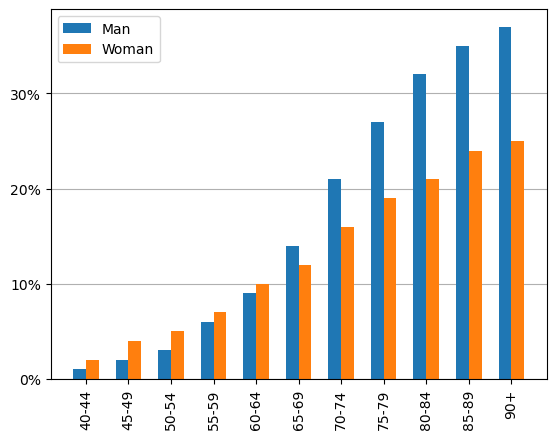

In [4]:
male_survivors = pd_data['male_survivors']
female_survivors = pd_data['female_survivors']
age = pd_data['age']

fig, ax = plt.subplots()

width = 0.3
x = np.arange(len(age))
ax.bar(x - width/2, male_survivors, width, label='male_surviros')
ax.bar(x + width/2, female_survivors, width, label='female_survivors')


ax.set_xticks(x)
ax.set_xticklabels(age)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_yticks(np.arange(0, 41, 10))
ax.set_yticklabels([f'{int(i)}%' for i in ax.get_yticks()])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.legend(['Man', 'Woman'], loc='upper left')

ax.plot()

🔥 Zadanie 4 🔥

Do wykresu słupkowego z poprzedniego zadania dodaj paski błędów, zarówno dla wykresu reprezentującego mężczyzn, jak i kobiety. Pamiętaj, że w przypadku tego wykresu błąd może występować tylko w osi y. Wartości błędów wylosuj. Przykład formatowania:

[]

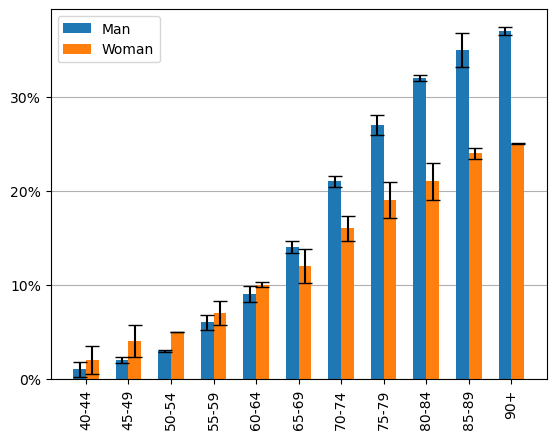

In [5]:
male_survivors = pd_data['male_survivors']
female_survivors = pd_data['female_survivors']
age = pd_data['age']

fig, ax = plt.subplots()

width = 0.3
x = np.arange(len(age))
ax.bar(x - width/2, male_survivors, width, label='male_surviros')
ax.bar(x + width/2, female_survivors, width, label='female_survivors')

# add error bars
yerr = np.random.uniform(0, 2, size=len(age))
ax.errorbar(x - width/2, male_survivors, yerr=yerr, fmt='none', capsize=5, capthick=1, ecolor='black')
yerr = np.random.uniform(0, 2, size=len(age))
ax.errorbar(x + width/2, female_survivors, yerr=yerr, fmt='none', capsize=5, capthick=1, ecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(age)

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_yticks(np.arange(0, 41, 10))
ax.set_yticklabels([f'{int(i)}%' for i in ax.get_yticks()])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.legend(['Man', 'Woman'], loc='upper left')

ax.plot()

🔥 Zadanie 5 🔥

Wczytaj plik: wyniki głosowania w wyborach prezydenckich w Rosji 2020

    Stwórz w wczytanym dataframe nową kolumnę zawierająca względną liczbę głosów za. Jest to iloraz wartości liczby głosów za (kolumna yes) do liczby głosów oddanych (kolumna given)
    Wyświetl histogram względnej liczby głosów za dla domyślnych ustawień
    Zmień liczbę binów histogramu na 100. Czy możesz zauważyć jakieś anomalie?


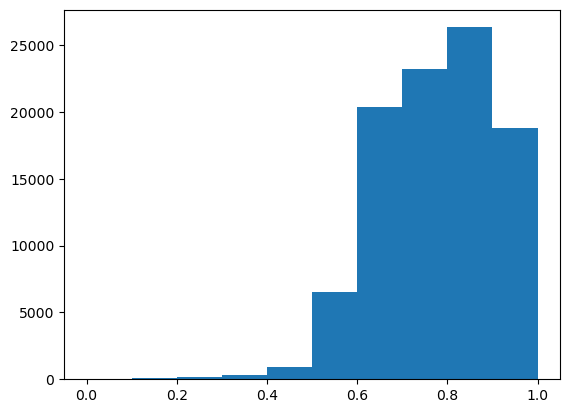

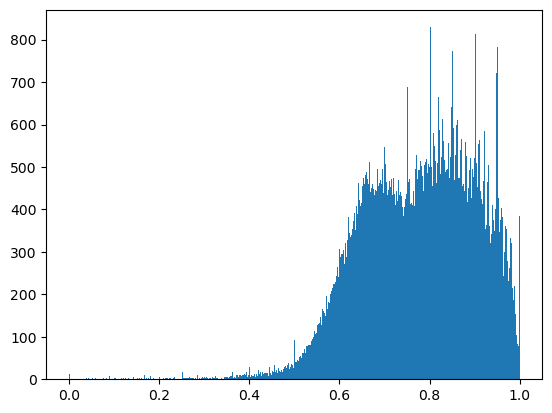

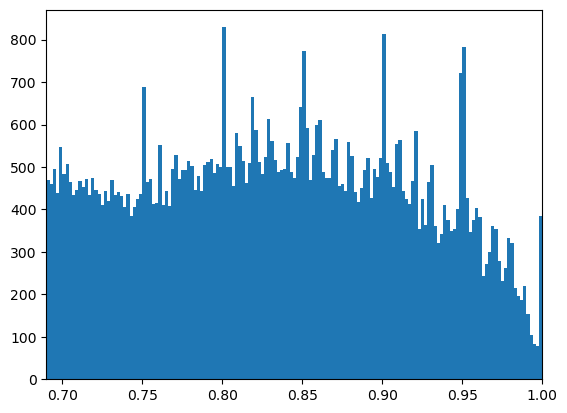

In [8]:
pd_votes = pd.read_csv('russia2020_vote.csv')

pd_votes['relative_votes'] = pd_votes['yes'] / pd_votes['given']
region = pd_votes['region_en']
relative_votes = pd_votes['relative_votes']

fig, ax = plt.subplots()
ax.hist(relative_votes.values)
plt.show()

fig, ax = plt.subplots()
ax.hist(relative_votes.values, bins=500)
plt.show()

fig, ax = plt.subplots()
ax.hist(relative_votes.values, bins=500)
ax.set_xlim(0.69, 1.0)
plt.show()